# Flop Counting & Performance Plot for Basic Implementation
<hr>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# --------------------------------------
# HARDWARE INFORMATION
# => Add your hardware information here
# --------------------------------------
hardware_info = "Intel(R) Core(TM) i9-8950HK CPU @ 2.90GHz \n" \
                "Cache Sizes - L1: 32KB, L2: 256KB, L3: 12MB \n" \
                "Compiler: Apple clang version 11.0.0 \n" \
                "OS: MacOS Catalina, 10.15.4";

### (A) Flop Counting 
$\rightarrow$ Functions to count flops of implemented methods

In [5]:
## ------------------------------------------
## Sub-Functions of Basic Implementation
## ------------------------------------------

def sure(n):
    adds = 12*n**2
    mults = 12*n**2
    divs = 0
    return np.array([adds, mults, divs])

def flt_channel_basic(f, r, n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 4) + (n-2*(r+f))**2
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 5) 
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+1) + (n-2*(r+f))**2 
    return np.array([adds, mults, divs])


def flt_buffer_basic(f, r, n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 6) + 3*(n-2*(r+f))**2
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 7) 
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+1) + 3*(n-2*(r+f))**2
    return np.array([adds, mults, divs])

def flt(f,r,n):
    adds = (n-2*(r+f))**2 * (2*r+1)**2 * (18*(2*f+1)**2 + 15) + 8*(n-2*(r+f))**2 
    mults = (n-2*(r+f))**2 * (2*r+1)**2 * (9*(2*f+1)**2 + 16) + 12*(n-2*(r+f))**2
    divs = (n-2*(r+f))**2 * (2*r+1)**2 * (3*(2*f+1)**2+4) + 3*(n-2*(r+f))**2 
    return np.array([adds, mults, divs])

def filter_averaging(n):
    adds = 12*n**2
    mults = 9*n**2
    divs = 9*n**2
    return np.array([adds, mults, divs])


## --------------------------------------------
## Sub-Functions of Restructured Implementation
## --------------------------------------------

def sure_all(n):
    adds = 27 * n**2
    mults = 12 * n**2
    divs = 0
    exps = 0
    minmax = 0 
    return np.array([adds, mults, divs, exps, minmax])

def filtering_basic(f, r, n):
    adds = 2
    adds += (2*r+1)**2 * (n-2*r)**2 * 18                  
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f))*(2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+5)         
    
    mults = 5
    mults += (2*r+1)**2 * (n-2*r)**2 * 6 
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 5
    
    divs = 1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3 
    divs += (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
                          
    minmax = (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2
    
    return np.array([adds, mults, divs, exps, minmax])

def feature_prefiltering(f, r, n):
    adds = 2
    adds += (2*r+1)**2 * (n-2*r)**2 * 18                 
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f)) * (2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+8)        
    
    mults = 5 
    mults += (2*r+1)**2 * (n-2*r)**2 * 6 
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 8
    
    divs = 1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3  
    divs += (n-2*(r+f))**2 * 6
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering(f, r, n):
    adds = 2
    adds += (n-2*(r+f))**2 * 15
    adds += (2*r+1)**2 * (n-2*r)**2 * 18
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 9
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f))* (2*f+1)
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * (2*f+5)
    
    mults = 5
    mults += (2*r+1)**2 * (n-2*r)**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 4
    
    divs =  1
    divs += (2*r+1)**2 * (n-2*r)**2 * 3
    divs += (2*r+1)**2 * (n-2*(r+f))**2 * 3
    divs += (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (n-2*(r+f))**2 * 6
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 12
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 1
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering_THIRD(f, r, n):
    adds = 2
    adds += (n-2*(r+f))**2 * 15
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 9
    adds += (2*r+1)**2 * (n-2*(r+f))**2 * 4
    
    mults = 7
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 6
    mults += (2*r+1)**2 * (n-2*(r+f))**2 * 3
    
    divs = 1
    divs +=  (2*r+1)**2 * (n-2*r)**2 * 3
    divs +=  (n-2*(r+f))**2 * 3
    
    exps = (2*r+1)**2 * (n-2*(r+f))**2
    
    minmax = (n-2*(r+f))**2 * 6
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f))**2 * 12
    
    return np.array([adds, mults, divs, exps, minmax])

def candidate_filtering_all(f_r, f_g, f_b, r, n):
    f_min = min(f_r, min(f_g, f_b))
    
    adds = 4
    adds += (n-2*(r+f_min))**2 * 15
    adds += (2*r+1)**2 * (n-2*r)**2 * 18
    adds += (2*r+1)**2 * (n-2*(r+f_min))**2 * 9
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f_r))* (2*f_r+1)
    adds += (2*r+1)**2 * (n-2*(r+f_r))**2 * (2*f_r+5)
    adds += (2*r+1)**2 * (n-2*r)*(n-2*(r+f_g))* (2*f_g+1)
    adds += (2*r+1)**2 * (n-2*(r+f_g))**2 * (2*f_g+5)
    adds += (2*r+1)**2 * (n-2*(r+f_b))**2 * 6
    
    mults = 14
    mults += (2*r+1)**2 * (n-2*r)**2 * 3
    mults += (2*r+1)**2 * (n-2*(r+f_min))**2 * 9
    mults += (2*r+1)**2 * (n-2*(r+f_r))**2 * 4
    mults += (2*r+1)**2 * (n-2*(r+f_g))**2 * 4
    mults += (2*r+1)**2 * (n-2*(r+f_b))**2 * 3
    
    divs = 2
    divs += (2*r+1)**2 * (n-2*r)**2 * 3
    divs += (2*r+1)**2 * (n-2*(r+f_min))**2 * 6
    divs += (n-2*(r+f_r))**2 * 3
    divs += (n-2*(r+f_g))**2 * 3
    divs += (n-2*(r+f_b))**2 * 3
    
    exps =  (2*r+1)**2 * (n-2*(r+f_b))**2
    exps += (2*r+1)**2 * (n-2*(r+f_r))**2
    exps += (2*r+1)**2 * (n-2*(r+f_g))**2
    
    minmax =  (n-2*(r+f_min))**2 * 3 
    minmax += (2*r+1)**2 * (n-2*r)**2 * 3
    minmax += (2*r+1)**2 * (n-2*(r+f_min))**2 * 18
    minmax += (2*r+1)**2 * (n-2*(r+f_r))**2 * 1
    minmax += (2*r+1)**2 * (n-2*(r+f_g))**2 * 1
    minmax += (2*r+1)**2 * (n-2*(r+f_b))**2 * 1
    
    return np.array([adds, mults, divs, exps, minmax])

def filter_averaging_improved(n):
    adds = 12*n**2
    mults = 9*n**2
    divs = 3*n**2
    exps = 0
    minmax = 0
    
    return np.array([adds, mults, divs, exps, minmax])

# --------------------------------------
# Main Methods
# --------------------------------------

def basic(n, R):

    # Compute op-count for one run of the basic implementation
    total = 2*flt_buffer_basic(3, 5, n)
    total += flt(1, R, n)
    total += flt(3, R, n)
    total += flt(1, R, n)
    total += (3*sure(n))
    total += (3*flt_channel_basic(1,1,n))
    # total += binary_selection(n)
    total += flt_channel_basic(1, 5, n)
    total += filter_averaging(n)
    
    return total

def restructured_without_precomp(n, R):
    total =  2 * filtering_basic(3, 5, n)
    total += candidate_filtering(1, R, n)
    total += candidate_filtering(3, R, n)
    total += candidate_filtering_THIRD(1, R, n)
    total += sure_all(n)
    total += filtering_basic(1,1,n)
    # total += binary_selection(n)
    total += filtering_basic(1, 5, n)
    total += filter_averaging_improved(n)
    
    return total

def restructured_with_precomp(n, R):
    
    total =  feature_prefiltering(3, 5, n)
    total += candidate_filtering_all(1, 3, 1, R, n)
    total += sure_all(n)
    total += filtering_basic(1,1,n)
    # total += binary_selection(n)
    total += filtering_basic(1, 5, n)
    total += filter_averaging_improved(n)
    
    return total;

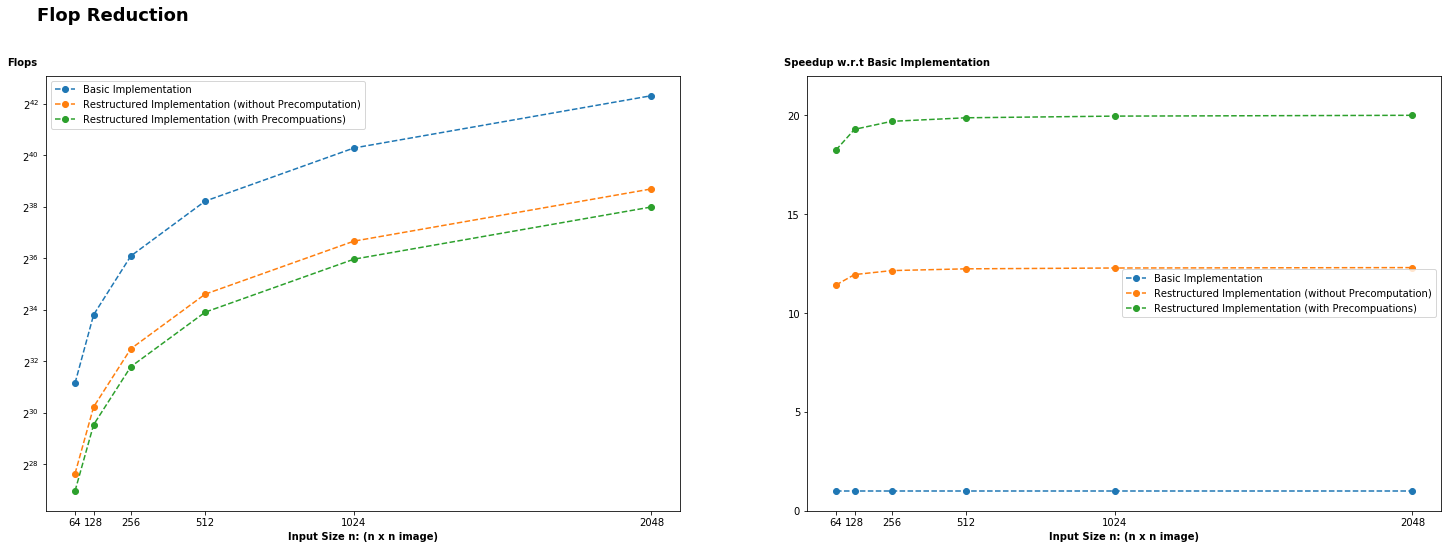

In [6]:
# Plot showing FLOP reduction for fixed R=10
R = 10
n = np.array([64, 128, 256, 512, 1024, 2048])

method = ["Basic Implementation", 
          "Restructured Implementation (without Precomputation)",
          "Restructured Implementation (with Precompuations)"]

flop_counters = [basic, restructured_without_precomp, restructured_with_precomp]

fig, axs = plt.subplots(1, 2, figsize=(25,8))

flops = np.zeros((len(method), len(n)))
flops_improvement = np.zeros((len(method), len(n)))

## ---------------------
# Compute baseline flops
## ---------------------
for i, size in enumerate(n):
    flops[0][i] = np.sum(flop_counters[0](size, R))
    flops_improvement[0][i] = 1

axs[0].plot(n, flops[0], 'o--', label=method[0])
axs[1].plot(n, flops_improvement[0], 'o--', label=method[0])
   
## --------------------------------------------------------------
# Compute Flops and Improvement Factor for more advanced Methods
## --------------------------------------------------------------
for m, m_name in enumerate(method[1:]):
    for i, size in enumerate(n):
        flops[m+1][i] = np.sum(flop_counters[m+1](size, R))
        flops_improvement[m+1][i] = flops[0][i] / flops[m+1][i]
    
    # Plot flops and flop speedup factor
    axs[0].plot(n, flops[m+1], 'o--', label=m_name)
    axs[1].plot(n, flops_improvement[m+1], 'o--', label=m_name)
    
## ---------------------
# Customize Plot
## ---------------------

suptitle = plt.suptitle("Flop Reduction", x=0.12, y=1., fontsize=18, ha='left', fontweight='bold')

# Subplot 1
axs[0].set_ylabel("Flops", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-0)
axs[0].set_xlabel("Input Size n: (n x n image)", fontweight='bold')
axs[0].set_xticks(n)
axs[0].set_yticks(np.arange(24, 48, step=4))
axs[0].set_yscale('log', basey=2)

# Subplot 2
axs[1].set_ylabel("Speedup w.r.t Basic Implementation", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-100)
axs[1].set_xlabel("Input Size n: (n x n image)", fontweight='bold')
axs[1].set_ylim(0,22)
axs[1].set_xticks(n)
axs[1].set_yticks(np.arange(0, 25, step=5))


axs[0].legend()
axs[1].legend()

fig.savefig('flop_reduction',bbox_inches='tight',bbox_extra_artists=[suptitle])

### (B) Runtime Plots (fixed R=10)
...

In [7]:
# ------------
# MEASUREMENTS
# ------------

series = [
          "Basic Implementation",
          "Restructured (Without Precomputation, Scalar Replacement)",
          "Restructured (Without Precomputation, Scalar Replacement, Unrolling/SSA)",
          "Restructured (Precomputation, Scalar Replacement)",
          "Restructured (Precomputations, Scalar Replacement, Unrolling/SSA)",
]

series_method = [basic, 
                 restructured_without_precomp,
                 restructured_without_precomp,
                 restructured_with_precomp,
                 restructured_with_precomp]


n = np.array([64, 80, 96, 112, 128, 256, 512])

cycles = np.array([
                    [2.38001e+09, 4.49588e+09, 7.26405e+09, 1.07094e+10, 1.5718e+10, 7.81106e+10, 3.40981e+11],
                    [2.2372e+08, 4.0894e+08, 6.30455e+08, 9.38708e+08, 1.31527e+09, 5.57855e+09, 2.29917e+10],
                    [1.61199e+08, 2.92289e+08, 4.41339e+08, 6.52054e+08, 9.34456e+08, 3.71063e+09, 1.52941e+10],
                    [1.94959e+08, 3.57035e+08, 5.58667e+08, 8.10664e+08, 1.16463e+09, 4.86565e+09, 2.01414e+10],
                    [1.38112e+08, 2.48561e+08, 3.76292e+08, 5.48233e+08, 7.54882e+08, 3.05102e+09, 1.24641e+10]
                  ])

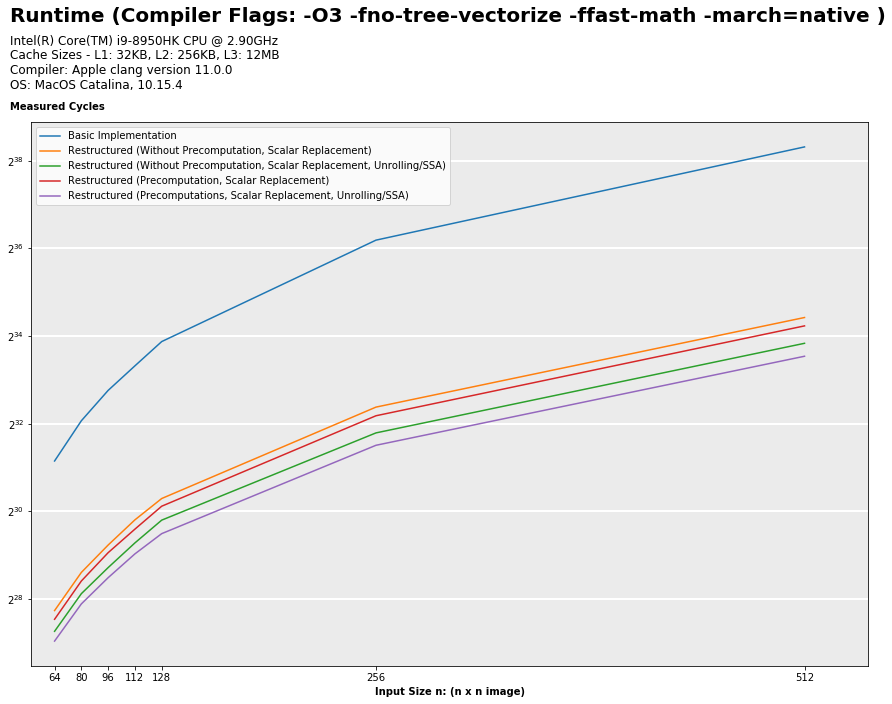

In [8]:
# ------------------------------------------------------
# RunTime-Plot (cylces are log-scaled)
# ------------------------------------------------------

# Init Plot
fig = plt.figure(figsize=(15,10))
suptitle = plt.suptitle("Runtime (Compiler Flags: -O3 -fno-tree-vectorize -ffast-math -march=native )", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 

# Plot Series
for i, serie in enumerate(series):
    plt.plot(n, cycles[i], label=serie)
    
    
# Customize Plot
plt.xticks(n)
plt.yscale('log', basey=2)
plt.xlim(50,550)

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.ylabel("Measured Cycles", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-50)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')

plt.legend()

fig.savefig('runtime_evaluation',bbox_inches='tight',bbox_extra_artists=[suptitle])

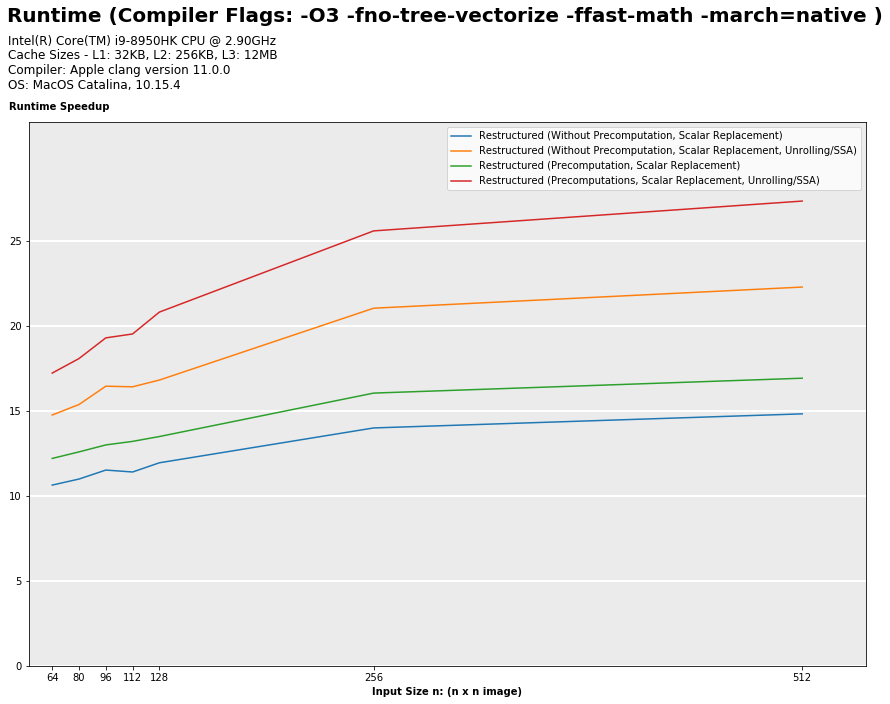

In [9]:
# ------------------------------------------------------
# Speedup-Plot
# ------------------------------------------------------

# Init Plot
fig = plt.figure(figsize=(15,10))
suptitle = plt.suptitle("Runtime (Compiler Flags: -O3 -fno-tree-vectorize -ffast-math -march=native )", x=0.105, y=1.04, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.05, ha='left') 

# Plot Series
for i, serie in enumerate(series[1:]):
    plt.plot(n, cycles[0] / cycles[i+1], color=label=serie)
    
    
# Customize Plot
top=30
plt.xticks(n)
plt.yticks(np.arange(0, top, step=5))
plt.xlim(50,550)
plt.ylim(0,32)

plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

plt.ylabel("Runtime Speedup", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-50)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')

plt.legend()

fig.savefig('speedup_runtime',bbox_inches='tight',bbox_extra_artists=[suptitle])

<hr>

## (C) Performance Plots (fixed R=10)
...

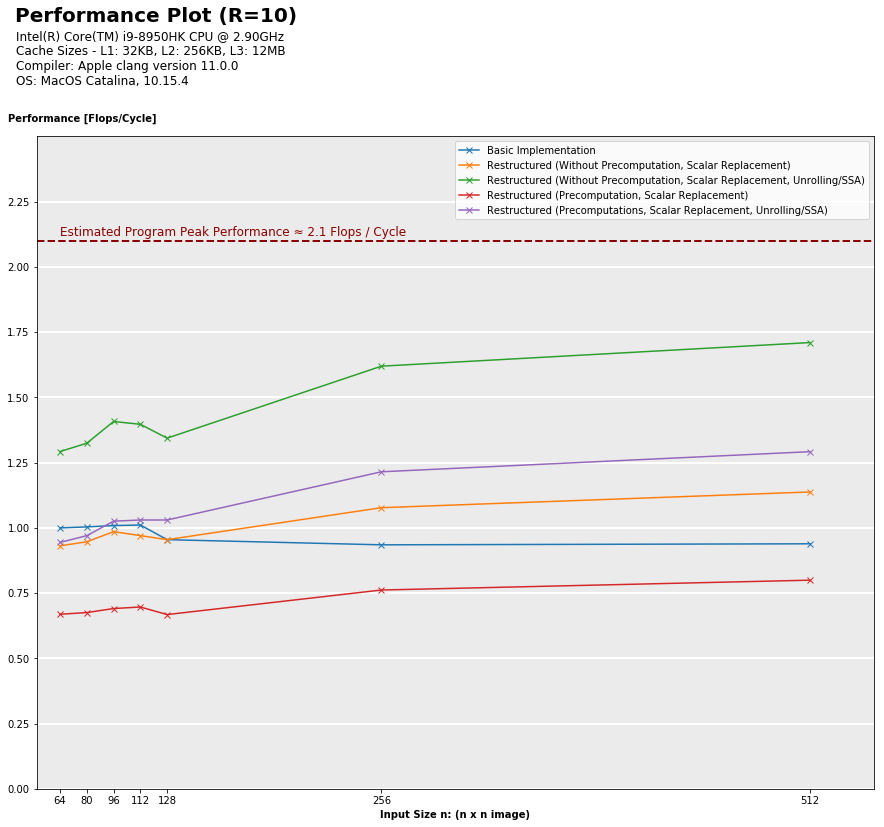

In [10]:
R = 10
performance = np.zeros((len(series), len(n)))

# Init Figure
fig = plt.figure(figsize=(15,12))

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(series):
    
    # Compute Performance for all resolutions
    for j, size in enumerate(n):
        flop_count = series_method[i](size,R).sum()
            
        performance[i][j] = flop_count / cycles[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x-', label=flag)


# Customize Plot 
top = 2.5
plt.xticks(n)
plt.yticks(np.arange(0, top, step=0.25))
plt.ylim(0,2.5)
plt.xlim(50,550)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Input Size n: (n x n image)", fontweight='bold')
plt.grid(True, color='w', linestyle='-', linewidth=2)
plt.gca().patch.set_facecolor('0.92')
plt.gca().xaxis.grid(False)
plt.gca().yaxis.grid(True)

# Add Estimated Tighter Program Peak Performance
plt.axhline(2.1, linestyle='--' , color="darkred", linewidth=2)
plt.text(64, 2.12, 'Estimated Program Peak Performance ≈ 2.1 Flops / Cycle', color="darkred", fontsize=12)

# Add Titles and Processor Information
suptitle = plt.suptitle("Performance Plot (R=10)", x=0.105, y=1.03, fontsize=20, ha='left', fontweight='bold')
plt.title(hardware_info, fontsize=12, x=-0.025, y=1.07, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 

### (D) Performance Plots (varying R)
$\rightarrow $ Measurments from: **Restructured (Precomputations, Scalar Replacement, Unrolling/SSA**, compiled with **-O3 -ffast-math -march=native -fno-tree-vectorize**

In [11]:
# MEASUREMENTS (for varying R) => for 

R = np.array([3,5,7,9,11,13,15])

n = [128,
     256,
     512]

cycles = np.array([
                  [2.4031e+08, 3.43009e+08, 5.06411e+08, 6.68815e+08, 8.32015e+08, 1.02981e+09, 1.12602e+09],
                  [8.69864e+08, 1.28235e+09, 1.90508e+09, 2.65239e+09, 3.52729e+09, 4.69081e+09, 5.69446e+09],
                  [3.49434e+09, 5.15235e+09, 7.49704e+09, 1.07271e+10, 1.44232e+10, 1.86136e+10, 2.32936e+10]
                ])

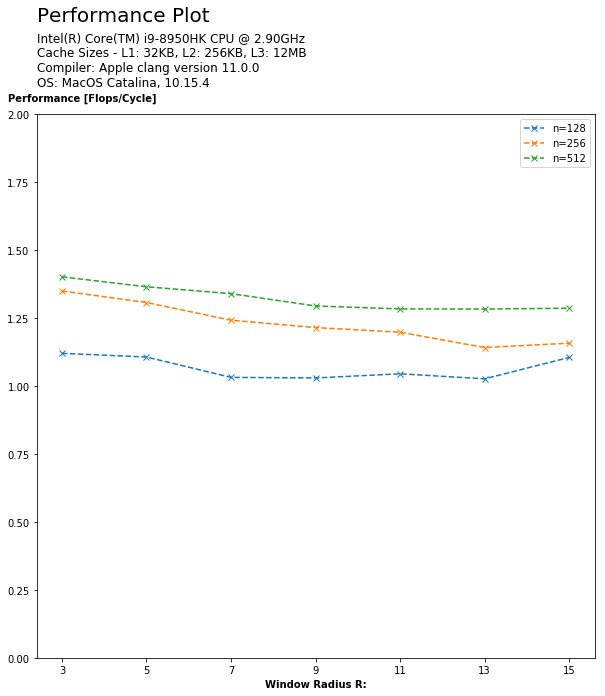

In [12]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with varying window size R
# ------------------------------------------------------

performance = np.zeros((len(n), len(R)))

# Init Figure
fig = plt.figure(figsize=(10,10))

for i, img_size in enumerate(n):
    
    # Compute performance for all windows sizes r 
    for r, win_size in enumerate(R):
        flop_count = restructured_with_precomp(img_size, win_size).sum()
        performance[i][r] = flop_count / cycles[i][r]
   
    plt.plot(R, performance[i], 'x--', label="n="+str(img_size))
             
# Customize Plot
plt.xticks(R)
plt.ylim(0,2)
plt.ylabel("Performance [Flops/Cycle]", fontweight='bold', rotation=0, position=(0,1.02), labelpad=-75)
plt.xlabel("Window Radius R:", fontweight='bold')

suptitle = plt.suptitle("Performance Plot", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot_varyingR',bbox_inches='tight',bbox_extra_artists=[suptitle]) 



<hr>

## Some Plots about Basic Implementation (more to come)

In [13]:
# ------------------------------------------------------
# MEASURED CYCLES 
# => copy output arrays of performance evaluation script
# ------------------------------------------------------

n = np.array([32, 64, 80, 96, 112, 128, 256, 512])

flags = ["-O0", 
         "-03 -fno-tree-vectorize", 
         "-03 -ffast-math -march=native"]

cycles2 = np.array([[8.09516e+08, 1.14798e+10, 2.07577e+10, 3.45336e+10, 4.98050e+10, 7.37735e+10, 3.45199e+11, 1.49453e+12],
                   [1.769e+08, 2.38142e+09, 4.50356e+09, 7.28734e+09, 1.07199e+10, 1.612e+10, 8.04228e+10, 3.48705e+11],
                   [1.78076e+08, 2.38001e+09, 4.49588e+09, 7.26405e+09, 1.07094e+10, 1.5718e+10, 7.81106e+10, 3.40981e+11]
                  ])

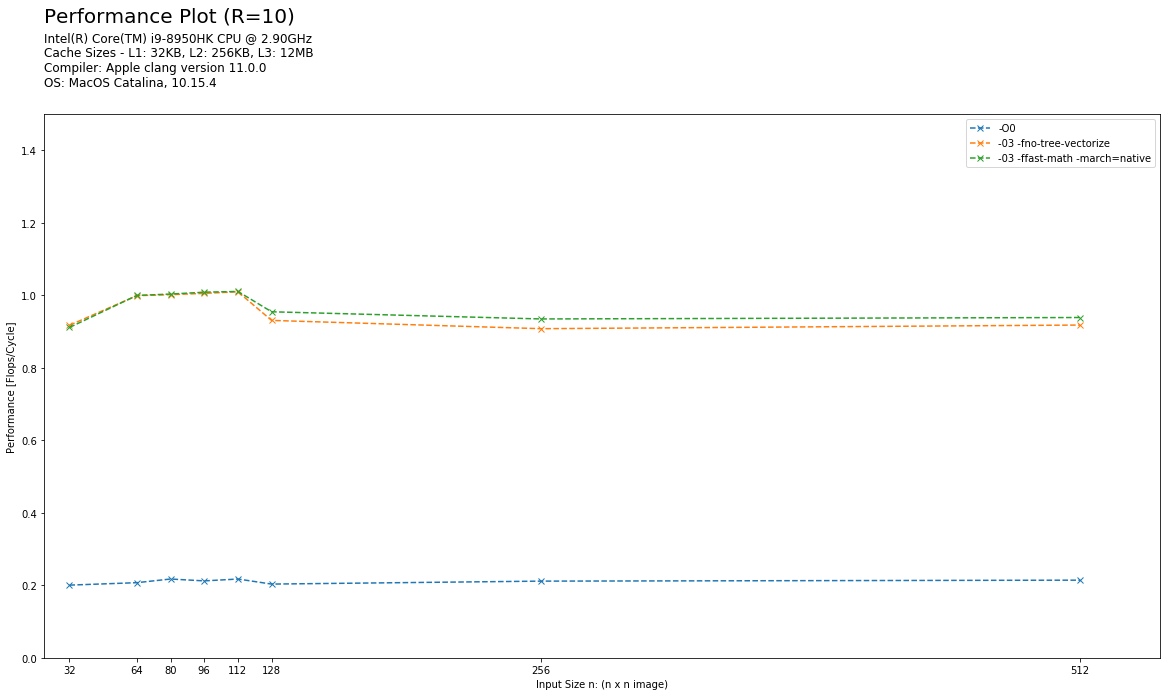

In [14]:
# ------------------------------------------------------
# PERFORMANCE PLOT
# => Basic Implementation with different compiler flags
# ------------------------------------------------------

R = 10
performance = np.zeros((len(flags), len(n)))

# Init Figure
fig = plt.figure(figsize=(20,10))

# Compute Performance for all series (different compiler flags)
for i, flag in enumerate(flags):
    
    # Compute Performance for all resolutions
    for j in range(n.shape[0]):
        flop_count = basic(n[j],R).sum()
        performance[i][j] = flop_count / cycles2[i][j]
        
    # Add serie to plot
    plt.plot(n, performance[i], 'x--', label=flag)


# Customize Plot 
plt.xticks(n)
plt.ylim(0,1.5)
plt.xlim(20,550)
plt.ylabel("Performance [Flops/Cycle]")
plt.xlabel("Input Size n: (n x n image)")

suptitle = plt.suptitle("Performance Plot (R=10)", x=0.125, y=1.03, fontsize=20, ha='left')
plt.title(hardware_info, fontsize=12, x=0, y=1.04, ha='left') 

plt.legend()
fig.savefig('performance_plot',bbox_inches='tight',bbox_extra_artists=[suptitle]) 